# Implementing the Gray-Scott Model for Coarse-Grained Reaction-Diffusion

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import signal
import imageio

%matplotlib inline

'''
Simulate function
Description: Simulate the Gray-Scott model for numIter iterations.
Inputs:
    - numIter:  number of iterations
    - A:        prey matrix
    - B:        predator matrix
    - f:        feed rate
    - k:        kill rate
    - dt:       time constant
    - dA:       prey diffusion constant
    - dB:       predator diffusion constant
    - lapl:     3 x 3 Laplacian matrix to calculate diffusion

Outputs:
    - A_matrices:   Prey matrices over the course of the simulation
    - B_matrices:   Predator matrices over the course of the simulation
'''


'\nSimulate function\nDescription: Simulate the Gray-Scott model for numIter iterations.\nInputs:\n    - numIter:  number of iterations\n    - A:        prey matrix\n    - B:        predator matrix\n    - f:        feed rate\n    - k:        kill rate\n    - dt:       time constant\n    - dA:       prey diffusion constant\n    - dB:       predator diffusion constant\n    - lapl:     3 x 3 Laplacian matrix to calculate diffusion\n\nOutputs:\n    - A_matrices:   Prey matrices over the course of the simulation\n    - B_matrices:   Predator matrices over the course of the simulation\n'

In [2]:
images = []

def simulate(numIter, A, B, f, k, dt, dA, dB, lapl, plot_iter):
    print("Running Simulation")
    start = time.time()

    # Run the simulation
    for iter in range(numIter):
        A_new = A + (dA * signal.convolve2d(A, lapl, mode='same', boundary='fill', fillvalue=0) - (A * B * B) + (f * (1-A))) * dt
        B_new = B + (dB * signal.convolve2d(B, lapl, mode='same', boundary='fill', fillvalue=0) + (A * B * B) - (k * B)) * dt
        A = np.copy(A_new)
        B = np.copy(B_new)
        if (iter % plot_iter is 0):
            plt.clf()
            plt.imshow((B / (A+B)),cmap='Spectral')
            plt.axis('off')
            now = time.time()
            # print("Seconds since epoch =", now-start)
            # plt.show()
            filename = 'gs_images/gs_'+str(iter)+'.png'
            plt.savefig(filename)
            images.append(imageio.imread(filename))

    return A, B


In [3]:
# _*_*_*_*_*_*_*_*_* GRID PROPERTIES *_*_*_*_*_*_*_*_*_*
#grid size, number of iterations, where the prey and predators start
grid_size = 101 # Needs to be odd
numIter = 5000;
seed_size = 11 # Needs to be an odd number
A = np.ones((grid_size,grid_size))
B = np.zeros((grid_size,grid_size))

# Seed the predators
B[int(grid_size/2)-int(seed_size/2):int(grid_size/2)+int(seed_size/2)+1, \
int(grid_size/2)-int(seed_size/2):int(grid_size/2)+int(seed_size/2)+1] = \
np.ones((seed_size,seed_size))


In [4]:
# _*_*_*_*_*_*_*_*_* SIMULATION VARIABLES *_*_*_*_*_*_*_*_*_*
# establishes feed rate, kill rate, time interval, diffusion rates, Laplacian matrix, rendering speed
f = 0.055
k = 0.117
dt = 1.0
dA = 1.0
dB = 0.5
lapl = np.array([[0.05, 0.2, 0.05],[0.2, -1.0, 0.2],[0.05, 0.2, 0.05]])
plot_iter = 50


Running Simulation


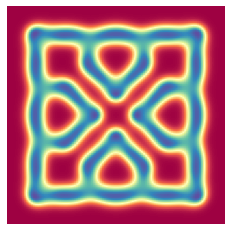

In [6]:
simulate(numIter, A, B, f, k, dt, dA, dB, lapl, plot_iter)
imageio.mimsave('gs_images/gs_movie.gif', images)


Changing some variables:

Running Simulation


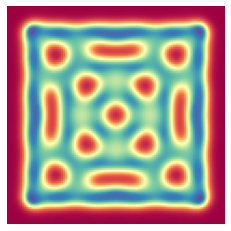

In [11]:
# changing kill and feed rate
f = 0.042
k = 0.101
dt = 1.0
dA = 1.0
dB = 0.5
lapl = np.array([[0.05, 0.2, 0.05],[0.2, -1.0, 0.2],[0.05, 0.2, 0.05]])
plot_iter = 50
simulate(numIter, A, B, f, k, dt, dA, dB, lapl, plot_iter)
imageio.mimsave('gs_images/gs_movie3.gif', images)